In [1]:
#Importing all the libraries needed

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

In [2]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']
bna_data.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index','Date' , 'Adj_low' , 'Adj_High' , 'Volume','Stock_name']
bna_data = bna_data.drop(columns=columnsToExclude)
print(bna_data)

      Adj_Close
0         7.320
1         7.320
2         7.310
3         7.320
4         7.340
...         ...
2684     11.305
2685     11.283
2686     11.349
2687     11.129
2688     11.173

[2689 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

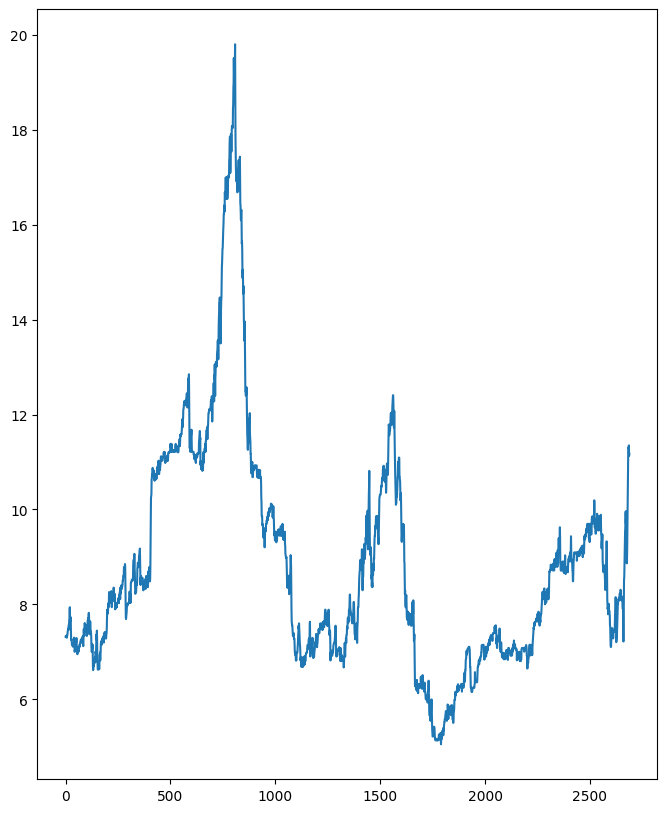

In [3]:
plt.figure(figsize=(8,10))
plt.plot(bna_data)
plt.show

In [4]:
train_data = bna_data[:-100]
test_data = bna_data[-100:]
train_data.shape , test_data.shape


((2589, 1), (100, 1))

In [5]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
train_data_scale = scaler.fit_transform(train_data)
base_days = 100 

x = []
y = []

for i in range(base_days , train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x , (x.shape[0],x.shape[1],1))

In [7]:
from keras.layers import Dense,Dropout, LSTM 
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences=True,
          input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Draysis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

model.fit(x,y, epochs = 50 , verbose = 1)

Epoch 1/50


78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - loss: 0.0312
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - loss: 0.0043
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0037
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0031
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0037
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0031
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0029
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0023
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0024
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0023
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0022
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0021
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0019
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0021
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss:

In [10]:
test_data = pd.concat((train_data.tail(100), test_data) , ignore_index = True)

In [11]:
test_data_scale = scaler.fit_transform(test_data)

x = []
y = []

for i in range(base_days , test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

x, y = np.array(x), np.array(y)

x = np.reshape(x , (x.shape[0],x.shape[1],1))

In [12]:
prediction = model.predict(x)
prediction = scaler.inverse_transform(prediction)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step


In [30]:

m = y  
z = []
future_days = 500
inter = None  
for i in range(base_days, len(m) + future_days):
    m = m.reshape(-1, 1)
    inter = [m[-base_days:, 0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1], 1))
    pred = model.predict(inter)
    m = np.append(m, pred)
    z = np.append(z, pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [31]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))
z

array([[10.51782115],
       [10.619112  ],
       [10.61114327],
       [10.54327413],
       [10.45532695],
       [10.36993609],
       [10.29177688],
       [10.2204589 ],
       [10.15436318],
       [10.09196824],
       [10.03224153],
       [ 9.97462575],
       [ 9.91889732],
       [ 9.86500891],
       [ 9.81297898],
       [ 9.76293871],
       [ 9.71476908],
       [ 9.66837287],
       [ 9.62369589],
       [ 9.58071054],
       [ 9.53951557],
       [ 9.50011808],
       [ 9.46250792],
       [ 9.42667169],
       [ 9.39243746],
       [ 9.35966369],
       [ 9.32824935],
       [ 9.29811494],
       [ 9.26918527],
       [ 9.24138613],
       [ 9.21465473],
       [ 9.18891867],
       [ 9.16409464],
       [ 9.14010186],
       [ 9.11690236],
       [ 9.09450336],
       [ 9.07288927],
       [ 9.05202226],
       [ 9.03185243],
       [ 9.01232725],
       [ 8.99340001],
       [ 8.97503411],
       [ 8.95719904],
       [ 8.93987886],
       [ 8.92307736],
       [ 8

In [ ]:
model.save("StockPredictionModel.keras")